<center><img src="https://i.imgur.com/zRrFdsf.png" width="700"></center>






# Neighboorhood and Spatial Correlation.



## Getting ready

Let me get two maps:

1. The USA map, at states level,  directly from census.gov, which has a good quality.

In [66]:
url = "https://www2.census.gov/geo/tiger/GENZ2023/shp/cb_2023_us_state_500k.zip"
us_states = gpd.read_file(url)
us_states.info(),us_states.crs.to_epsg(),us_states.crs.is_projected

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   STATEFP   56 non-null     object  
 1   STATENS   56 non-null     object  
 2   GEOIDFQ   56 non-null     object  
 3   GEOID     56 non-null     object  
 4   STUSPS    56 non-null     object  
 5   NAME      56 non-null     object  
 6   LSAD      56 non-null     object  
 7   ALAND     56 non-null     int64   
 8   AWATER    56 non-null     int64   
 9   geometry  56 non-null     geometry
dtypes: geometry(1), int64(2), object(7)
memory usage: 4.5+ KB


(None, 4269, False)

Notice this map has basic information per state. Also, notice the current crs will plot this:

<Axes: >

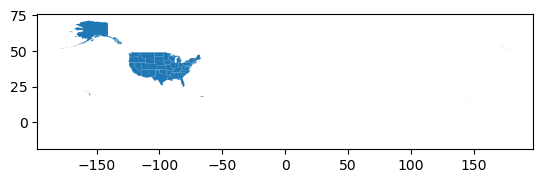

In [67]:
us_states.plot()

Let's reproject this map:

<Axes: >

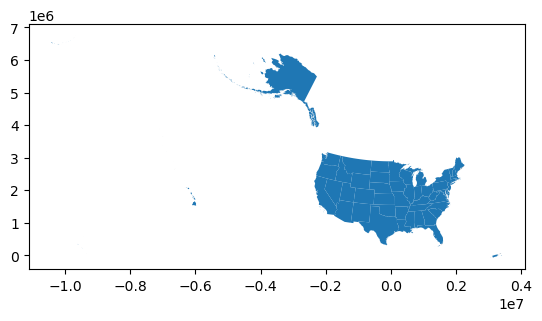

In [68]:
us_states=us_states.to_crs(5070)
us_states.plot()

2. A map of Peru, at the 'distrito' level (similar to municipality in the USA - not exactly the same). The map comes from an unoffical [website](https://www.geogpsperu.com/p/descargas.html). Some columns have been added.

In [69]:
peruDataLink="https://github.com/CienciaDeDatosEspacial/dataSets/raw/refs/heads/main/PERU/PeruMaps.gpkg"
peru_distritos=gpd.read_file(peruDataLink,layer='distritos')
peru_distritos.info(),peru_distritos.crs.to_epsg(),peru_distritos.crs.is_projected

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   DEPARTAMEN                1874 non-null   object  
 1   PROVINCIA                 1874 non-null   object  
 2   DISTRITO                  1874 non-null   object  
 3   Ubigeo                    1874 non-null   object  
 4   Poblacion                 1874 non-null   int64   
 5   Superficie                1874 non-null   float64 
 6   IDH2019                   1874 non-null   float64 
 7   Educ_sec_comp2019_pct     1874 non-null   float64 
 8   NBI2017_pct               1874 non-null   float64 
 9   Viv_sin_serv_hig2017_pct  1874 non-null   float64 
 10  geometry                  1874 non-null   geometry
dtypes: float64(5), geometry(1), int64(1), object(4)
memory usage: 161.2+ KB


(None, 4326, False)

Let's reproject and plot:

<Axes: >

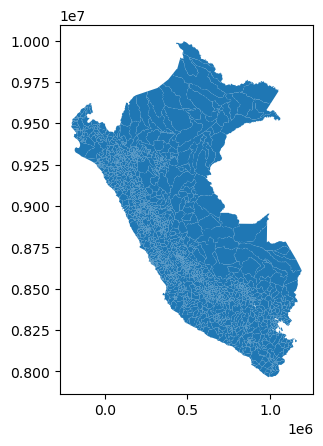

In [71]:
peru_distritos=peru_distritos.to_crs(5387)
peru_distritos.plot()

Besides the spatial units (DEPARTAMEN, PROVINCIA, DISTRITO, and Ubigeo - "Ubigeo" is a code ), you have:
 - Poblacion: Population (2017)
 - Superficie: Area               
 - IDH2019: Human Development Index for DISTRITO (2019)                   
 - Educ_sec_comp2019_pct: Share of Population that finished High-School (2019)     
 - NBI2017_pct: Share of Population with poverty at the household level aggregated by DISTRITO. This index ("Unsatisfied Basic Needs") uses observable living conditions rather than income alone (2017).
 - Viv_sin_serv_hig2017_pct: Share of housing units that have no sanitation infrastructure aggregated by  DISTRITO (2017)

## Who is my neighbor?

The basic idea is pretty simple; but as usual in social matters, a simple concept may have  different definitions. If we restrict our concept to spatial matters, a neighbor is whoever or whichever is close or nearby. 

So far we have found ways to 'detect' a neighbor for a particular spatial unit:

- Whichever is within a radius, using buffers.
- Whichever touches my boundaries, using sjoins.
- Whichever is within an area of interest, using sjoins/overlays.

In all the above, distance and set operations have played a major role. Now let's explore a different approach—a relational one—where the concepts from chess (rook, queen, and bishop) become surprisingly useful.

Take a look at the **queen** and **rook** relationship:

<center><img src="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/blob/main/rookQueen.png?raw=true" width="700"></center>

In [73]:
from libpysal.graph import Graph

Graph.build_contiguity(us_states,contiguity)

Signature:
Graph.build_contiguity(
    geometry,
    rook=True,
    by_perimeter=False,
    strict=False,
)
Docstring:
Generate Graph from geometry based on contiguity

Contiguity builder assumes that all geometries are forming a coverage, i.e.
a non-overlapping mesh and neighbouring geometries share only points or
segments of their exterior boundaries. In practice, ``build_contiguity`` is
capable of creating a Graph of partially overlapping geometries when
``strict=False, by_perimeter=False``, but that would not strictly follow the
definition of queen or rook contiguity.

Parameters
----------
geometry : array-like of shapely.Geometry objects
    Could be geopandas.GeoSeries or geopandas.GeoDataFrame, in which case the
    resulting Graph is indexed by the original index. If an array of
    shapely.Geometry objects is passed, Graph will assume a RangeIndex.
rook : bool, optional
    Contiguity method. If True, two geometries are considered neighbours if
    they share at least one edg

See the contents:

In [5]:
datadisMap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   DEPARTAMEN                1874 non-null   object  
 1   PROVINCIA                 1874 non-null   object  
 2   DISTRITO                  1874 non-null   object  
 3   Ubigeo                    1874 non-null   object  
 4   Poblacion                 1874 non-null   int64   
 5   Superficie                1874 non-null   float64 
 6   IDH2019                   1874 non-null   float64 
 7   Educ_sec_comp2019_pct     1874 non-null   float64 
 8   NBI2017_pct               1874 non-null   float64 
 9   Viv_sin_serv_hig2017_pct  1874 non-null   float64 
 10  geometry                  1874 non-null   geometry
dtypes: float64(5), geometry(1), int64(1), object(4)
memory usage: 161.2+ KB


## Spatial Properties: determining the _neighborhood_

We can compute the neighborhood for each object in a map using different options:

1. The polygons that share borders:
<center><img src="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/blob/main/rookQueen.png?raw=true" width="700"></center>



In [6]:
from libpysal.weights import Queen, Rook, KNN

# rook
w_rook = Rook.from_dataframe(datadisMap,use_index=False) 

/opt/anaconda3/envs/spatial_311py/lib/python3.11/site-packages/libpysal/weights/contiguity.py:61: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 89, 122.
  W.__init__(self, neighbors, ids=ids, **kw)


In [37]:
w_rook

In [7]:
w_rook.islands

[89, 122]

2. The polygons that share at least a point:

In [8]:
# queen
w_queen = Queen.from_dataframe(datadisMap,use_index=False)

/opt/anaconda3/envs/spatial_311py/lib/python3.11/site-packages/libpysal/weights/contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 3 disconnected components.
 There are 2 islands with ids: 89, 122.
  W.__init__(self, neighbors, ids=ids, **kw)


In [9]:
w_queen.islands

[89, 122]

Let me show the islands detected in the previous steps:

In [10]:
datadisMap.iloc[w_queen.islands,:].explore()

The presence of _islands_ will be problematic in more complex applications. An alternative is:

3) Nearest neighbors:

In [11]:
# k=8 nearest neighbors
w_knn8 = KNN.from_dataframe(datadisMap, k=8)

In [12]:
w_knn8.islands

[]

Let's understand the differences:

In [13]:
# first district in the GDF:
datadisMap.tail()

,DEPARTAMEN,PROVINCIA,DISTRITO,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
1869,LIMA,LIMA,CIENEGUILLA,150109,50486,240.33,0.637172,69.643266,24.7,2.3,"MULTIPOLYGON (((-76.72917 -11.99948, -76.72596..."
1870,LIMA,LIMA,ANCON,150102,42124,285.45,0.668889,72.117976,21.7,1.1,"MULTIPOLYGON (((-77.06501 -11.57523, -77.06499..."
1871,LIMA,LIMA,CARABAYLLO,150106,322936,303.31,0.649869,74.114567,20.0,1.4,"MULTIPOLYGON (((-76.89892 -11.72963, -76.89768..."
1872,CALLAO,CALLAO,MI PERU,070107,63542,2.52,0.643710,67.812626,17.1,0.2,"MULTIPOLYGON (((-77.11491 -11.84189, -77.1145 ..."
1873,LIMA,LIMA,SANTIAGO DE SURCO,150140,363183,35.89,0.801757,78.743024,3.6,0.1,"MULTIPOLYGON (((-76.95742 -12.07604, -76.95741..."


In [14]:
# amount of neighbors of that district
len(w_rook.neighbors[1870]),len(w_queen.neighbors[1870])

(6, 7)

In [15]:
datadisMap.iloc[w_rook.neighbors[1870] ,]

,DEPARTAMEN,PROVINCIA,DISTRITO,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
1824,LIMA,LIMA,SANTA ROSA,150139,20112,21.35,0.660577,67.618560,26.5,1.3,"MULTIPOLYGON (((-77.18443 -11.78003, -77.15744..."
1825,LIMA,LIMA,PUENTE PIEDRA,150125,378910,72.81,0.663263,73.192237,23.3,3.2,"MULTIPOLYGON (((-77.0909 -11.82192, -77.09048 ..."
1826,CALLAO,CALLAO,VENTANILLA,070106,402038,69.93,0.600316,69.088719,20.3,1.0,"MULTIPOLYGON (((-77.13521 -11.81782, -77.13516..."
884,LIMA,CANTA,HUAMANTANGA,150403,1349,488.09,0.377658,58.979443,34.3,30.2,"MULTIPOLYGON (((-76.75683 -11.42744, -76.75477..."
889,LIMA,HUARAL,AUCALLAMA,150604,20446,729.41,0.606012,64.143800,39.8,25.6,"MULTIPOLYGON (((-76.98385 -11.35391, -76.98241..."
1871,LIMA,LIMA,CARABAYLLO,150106,322936,303.31,0.649869,74.114567,20.0,1.4,"MULTIPOLYGON (((-76.89892 -11.72963, -76.89768..."


<Axes: >

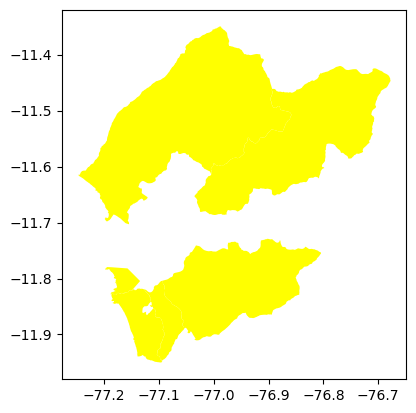

In [16]:
# see the neighbor
datadisMap.iloc[w_rook.neighbors[1870] ,].plot(facecolor="yellow")

<Axes: >

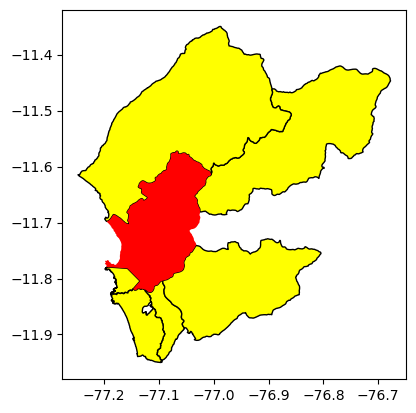

In [17]:
# see whole area
base=datadisMap.iloc[w_rook.neighbors[1870] ,].plot(facecolor="yellow",edgecolor='k')
datadisMap.loc[datadisMap.DISTRITO=='ANCON'].plot(ax=base,facecolor="red")

Let's do the same with queen neighbors:

In [18]:
# details
datadisMap.iloc[w_queen.neighbors[1870] ,]

,DEPARTAMEN,PROVINCIA,DISTRITO,Ubigeo,Poblacion,Superficie,IDH2019,Educ_sec_comp2019_pct,NBI2017_pct,Viv_sin_serv_hig2017_pct,geometry
1824,LIMA,LIMA,SANTA ROSA,150139,20112,21.35,0.660577,67.618560,26.5,1.3,"MULTIPOLYGON (((-77.18443 -11.78003, -77.15744..."
1825,LIMA,LIMA,PUENTE PIEDRA,150125,378910,72.81,0.663263,73.192237,23.3,3.2,"MULTIPOLYGON (((-77.0909 -11.82192, -77.09048 ..."
1826,CALLAO,CALLAO,VENTANILLA,070106,402038,69.93,0.600316,69.088719,20.3,1.0,"MULTIPOLYGON (((-77.13521 -11.81782, -77.13516..."
867,LIMA,CANTA,SANTA ROSA DE QUIVES,150407,8388,408.11,0.600015,64.467441,33.8,9.5,"MULTIPOLYGON (((-76.70142 -11.55653, -76.69952..."
884,LIMA,CANTA,HUAMANTANGA,150403,1349,488.09,0.377658,58.979443,34.3,30.2,"MULTIPOLYGON (((-76.75683 -11.42744, -76.75477..."
889,LIMA,HUARAL,AUCALLAMA,150604,20446,729.41,0.606012,64.143800,39.8,25.6,"MULTIPOLYGON (((-76.98385 -11.35391, -76.98241..."
1871,LIMA,LIMA,CARABAYLLO,150106,322936,303.31,0.649869,74.114567,20.0,1.4,"MULTIPOLYGON (((-76.89892 -11.72963, -76.89768..."


<Axes: >

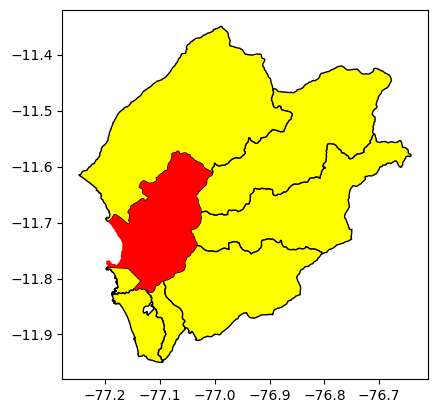

In [19]:
# whole area
# see whole area
base=datadisMap.iloc[w_queen.neighbors[1870] ,].plot(facecolor="yellow",edgecolor='k')
datadisMap.loc[datadisMap.DISTRITO=='ANCON'].plot(ax=base,facecolor="red")

What about the _eight_ closest ones?

In [20]:
w_knn8.neighbors[1870]

[np.int64(1824),
 np.int64(1872),
 np.int64(1825),
 np.int64(1871),
 np.int64(1826),
 np.int64(889),
 np.int64(1829),
 np.int64(867)]

<Axes: >

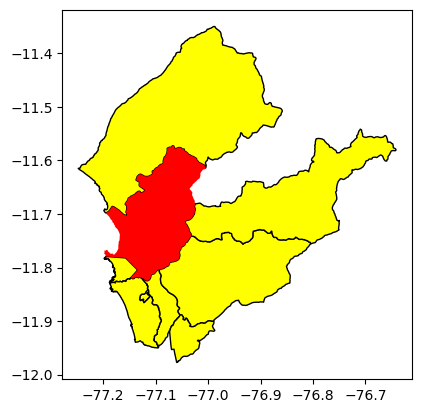

In [21]:
base=datadisMap.iloc[w_knn8.neighbors[1870] ,].plot(facecolor="yellow",edgecolor='k')
datadisMap.loc[datadisMap.DISTRITO=='ANCON'].plot(ax=base,facecolor="red")

## Global spatial correlation

If a spatial unit (a row) value in a variable is correlated with values of the neighbors, you know that proximity is interfering with the interpretation.

We need the neighboorhood matrix (the weight matrix) to compute spatial correlation.

In [22]:
pd.DataFrame(*w_knn8.full()) # 1 means both are neighbors

,0,1,2,3,4,5,6,7,8,9,...,1864,1865,1866,1867,1868,1869,1870,1871,1872,1873
0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1871,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1872,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


If we standardize by row, the neighboors in a row add to 1:

In [23]:
# needed for spatial correlation
w_knn8.transform = 'R'

In [24]:
# after transformation
pd.DataFrame(*w_knn8.full()).sum(axis=1)

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1869    1.0
1870    1.0
1871    1.0
1872    1.0
1873    1.0
Length: 1874, dtype: float64

Spatial correlation is measured by the Moran's I statistic:

In [25]:
from esda.moran import Moran

moranIDH = Moran(datadisMap['IDH2019'], w_knn8)
moranIDH.I,moranIDH.p_sim

(np.float64(0.6344647804225823), np.float64(0.001))

A significant Moran's I suggest spatial correlation. Let's see the spatial scatter plot

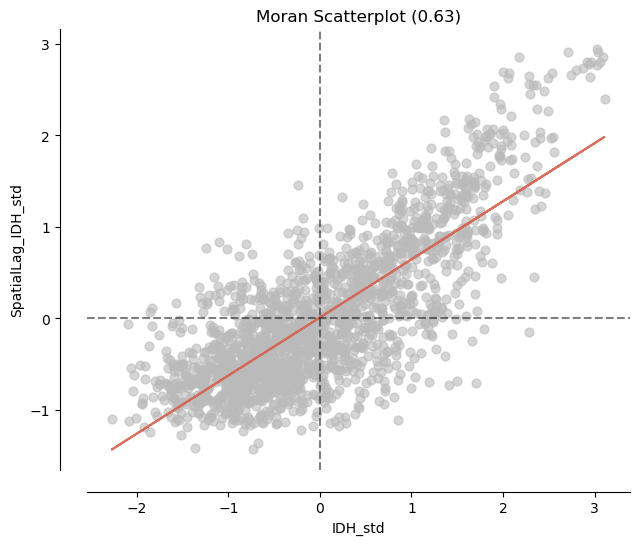

In [26]:
from splot.esda import moran_scatterplot

fig, ax = moran_scatterplot(moranIDH, aspect_equal=True)
ax.set_xlabel('IDH_std')
ax.set_ylabel('SpatialLag_IDH_std');

### Exercise 7

<div class="alert-success">
    
1. Compute the Moran's coefficient for **one** of your three  numeric variables.
    
2. Make a scatter plot for each variable.
    
</div>

## Local Spatial Correlation

We can compute a Local Index of Spatial Association (LISA -local Moran) for each map object. That will help us find spatial clusters (spots) and spatial outliers:

* A **hotSpot** is a polygon whose value in the variable is high AND is surrounded with polygons with also high values.

* A **coldSpot** is a polygon whose value in the variable is low AND is surrounded with polygons with also low values.

* A **coldOutlier** is a polygon whose value in the variable is low BUT is surrounded with polygons with  high values.

* A **hotOutlier** is a polygon whose value in the variable is high BUT is surrounded with polygons with  low values.

It is also possible that no significant correlation is detected. Let's see those values:

In [27]:
# A LISA for each district using IDH2019
from esda.moran import Moran_Local
lisaIDH = Moran_Local(y=datadisMap['IDH2019'], w=w_knn8,seed=2022)

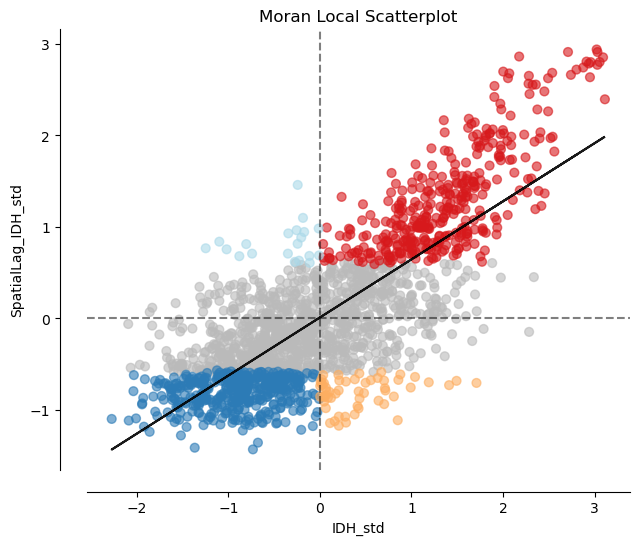

In [28]:
fig, ax = moran_scatterplot(lisaIDH,p=0.05)
ax.set_xlabel('IDH_std')
ax.set_ylabel('SpatialLag_IDH_std');

You find that a district is in a **quadrant**. If the district is NOT grey, then the LISA is significant. Let's represent that information in a map, using the lisaIDH object:

In [29]:
# quadrant, # significance
lisaIDH.q, lisaIDH.p_sim

(array([1, 1, 1, ..., 1, 1, 1], shape=(1874,)),
 array([0.001, 0.008, 0.005, ..., 0.001, 0.001, 0.001], shape=(1874,)))

In [30]:
# quadrant: 1 HH,  2 LH,  3 LL,  4 HL
pd.Series(lisaIDH.q).value_counts()

3    888
1    616
4    211
2    159
Name: count, dtype: int64

The info in **lisaIDH.q** can not be used right away, we need to add if the local spatial correlation is significant:

In [31]:
datadisMap['IDH_quadrant']=[l if p <0.05 else 0 for l,p in zip(lisaIDH.q,lisaIDH.p_sim)  ]
datadisMap['IDH_quadrant'].value_counts()

IDH_quadrant
0    1005
3     422
1     371
4      56
2      20
Name: count, dtype: int64

Now, we recode:

In [32]:
labels = [ '0 no_sig', '1 hotSpot', '2 coldOutlier', '3 coldSpot', '4 hotOutlier']

datadisMap['IDH_quadrant_names']=[labels[i] for i in datadisMap['IDH_quadrant']]

datadisMap['IDH_quadrant_names'].value_counts()

IDH_quadrant_names
0 no_sig         1005
3 coldSpot        422
1 hotSpot         371
4 hotOutlier       56
2 coldOutlier      20
Name: count, dtype: int64

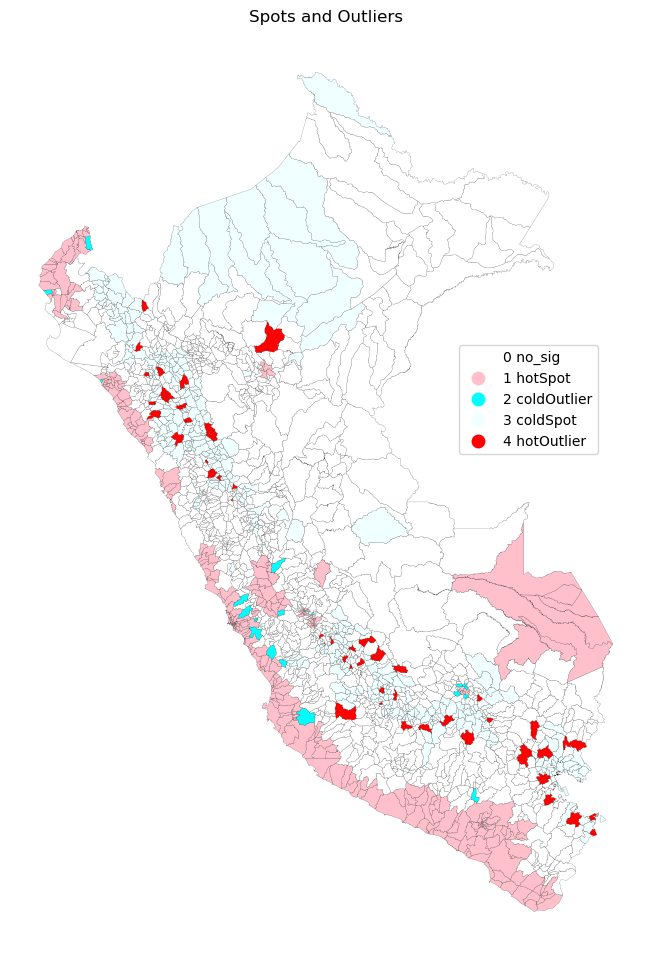

In [35]:
import matplotlib.pyplot as plt
# custom colors
from matplotlib import colors
myColMap = colors.ListedColormap([ 'white', 'pink', 'cyan', 'azure','red'])

# Set up figure and ax
f, ax = plt.subplots(1, figsize=(12,12))
# Plot unique values choropleth including
# a legend and with no boundary lines

plt.title('Spots and Outliers')

datadisMap.plot(column='IDH_quadrant_names', 
                categorical=True,
                cmap=myColMap,
                linewidth=0.1, 
                edgecolor='k',
                legend=True,
                legend_kwds={'loc': 'center left', 
                             'bbox_to_anchor': (0.7, 0.6)},
                ax=ax)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()